***Transition Visualization Notebook***

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys

sys.path.append('../')

from bout_machine import BoutMachine
import visualize.bout_vis as bout_vis
from FileCurtain import FileCurtain

In [13]:
groomFileCurtain = FileCurtain('/Users/brogab/Documents/JAXFell25/library/groom_pathlib.txt')
searchLogCurtain = FileCurtain('/Users/brogab/Documents/JAXFell25/library/searchLog_pathlib.txt')

asd_bouts_fpath = groomFileCurtain.fpaths['ASD_bouts']
bxd_bouts_fpath = groomFileCurtain.fpaths['BXD_bouts']
jab_bouts_fpath = groomFileCurtain.fpaths['JABS1200']

In [3]:
trans_ref = {
    'cor_all': ['01', '12', '23', '34', '45', '56', '60'],
    'incor0': ['02', '03', '04', '05', '06'],
    'incor1': ['13', '14', '15', '16', '10'],
    'incor2': ['21', '24', '25', '26', '20'],
    'incor3': ['31', '32', '35', '36', '30'],
    'incor4': ['41', '42', '43', '46', '40'],
    'incor5': ['51', '52', '53', '54', '50'],
    'incor6': ['61', '62', '63', '64', '65']
}

strat_trans_ref = {
    'tran0': ['01', '02', '03', '04', '05', '06'],
    'tran1': ['10', '12', '13', '14', '15', '16'],
    'tran2': ['20', '21', '23', '24', '25', '26'],
    'tran3': ['30', '31', '32', '34', '35', '36'],
    'tran4': ['40', '41', '42', '43', '45', '46'],
    'tran5': ['50', '51', '52', '53', '54', '56'],
    'tran6': ['60', '61', '62', '63', '64', '65']
}

In [7]:
bxd25 = pd.read_csv(
    searchLogCurtain.fpaths['BXD25'], dtype={
        "target": "string",
        "match_num": "int",
        #"interval": "tuple",
        "bout_num": "int",
        "sex": "string",
        "strain": "string",
        #"duration": "list",
        "video_search_index": "int",
        "video_name": "string"
    }
)
bxd25_strains = bxd25['strain'].unique()

print(bxd25.shape)
print(bxd25.dtypes)
print(bxd25_strains)

bxd25.head()

(7144, 9)
target                string[python]
match_num                      int64
interval                      object
bout_num                       int64
sex                   string[python]
strain                string[python]
duration                      object
video_search_index             int64
video_name            string[python]
dtype: object
<StringArray>
['BXD194/RwwJ', 'BXD214/RwwJ',  'BXD44/RwwJ',   'BXD31/TyJ',   'BXD19/TyJ',
 'BXD125/RwwJ']
Length: 6, dtype: string


,target,match_num,interval,bout_num,sex,strain,duration,video_search_index,video_name
0,12,1,"(34512, 34550)",23,M,BXD194/RwwJ,[21 17],0,/projects/kumar-lab/bxd-survey-dataset/unalign...
1,12,2,"(46612, 46759)",27,M,BXD194/RwwJ,[138 9],0,/projects/kumar-lab/bxd-survey-dataset/unalign...
2,12,3,"(47185, 47204)",27,M,BXD194/RwwJ,[ 8 11],0,/projects/kumar-lab/bxd-survey-dataset/unalign...
3,12,4,"(59846, 60015)",33,M,BXD194/RwwJ,[140 29],0,/projects/kumar-lab/bxd-survey-dataset/unalign...
4,12,5,"(70154, 70288)",38,M,BXD194/RwwJ,[87 47],0,/projects/kumar-lab/bxd-survey-dataset/unalign...


In [8]:
correct_trans_df = None
for idx, strain in enumerate(bxd25_strains):
    strain_slice = bxd25[bxd25['strain']==strain]
    #print(f'strain: {strain}, shape: {strain_slice.shape}')
    correct_trans_strain = {
        'strain': strain,
        #'total_trans': strain_slice.shape[0],
        '01': (strain_slice['target'] == '01').sum(),
        '12': (strain_slice['target'] == '12').sum(),
        '23': (strain_slice['target'] == '23').sum(),
        '34': (strain_slice['target'] == '34').sum(),
        '45': (strain_slice['target'] == '45').sum(),
        '56': (strain_slice['target'] == '56').sum(),
        '60': (strain_slice['target'] == '60').sum()
    }
    if idx == 0:
        correct_trans_df = pd.DataFrame([correct_trans_strain])
    else:
        correct_trans_df = pd.concat([correct_trans_df, pd.DataFrame([correct_trans_strain])], ignore_index=True)

incor_trans_df = None
for idx, strain in enumerate(bxd25_strains):
    strain_slice = bxd25[bxd25['strain']==strain]
    #print(f'strain: {strain}, shape: {strain_slice.shape}')
    incor_trans_strain = {
        'strain': strain,
        #'total_trans': strain_slice.shape[0],
        'incor0': (strain_slice['target'].isin(trans_ref['incor0'])).sum(),
        'incor1': (strain_slice['target'].isin(trans_ref['incor1'])).sum(),
        'incor2': (strain_slice['target'].isin(trans_ref['incor2'])).sum(),
        'incor3': (strain_slice['target'].isin(trans_ref['incor3'])).sum(),
        'incor4': (strain_slice['target'].isin(trans_ref['incor4'])).sum(),
        'incor5': (strain_slice['target'].isin(trans_ref['incor5'])).sum(),
        'incor6': (strain_slice['target'].isin(trans_ref['incor6'])).sum()
    }
    if idx == 0:
        incor_trans_df = pd.DataFrame([incor_trans_strain])
    else:
        incor_trans_df = pd.concat([incor_trans_df, pd.DataFrame([incor_trans_strain])], ignore_index=True)

In [9]:
cor_mat = correct_trans_df.iloc[:, 1:].to_numpy(dtype=np.int64)
incor_mat = incor_trans_df.iloc[:, 1:].to_numpy(dtype=np.int64)

per_cor_trans_mat = 100 * cor_mat / (cor_mat + incor_mat)

transitions = correct_trans_df.columns[1:]
strains = correct_trans_df['strain']

plot_df = pd.DataFrame(per_cor_trans_mat, columns=transitions).reset_index(names='strain')

plot_df = plot_df.melt(id_vars='strain', var_name='transition', value_name='percent_correct')

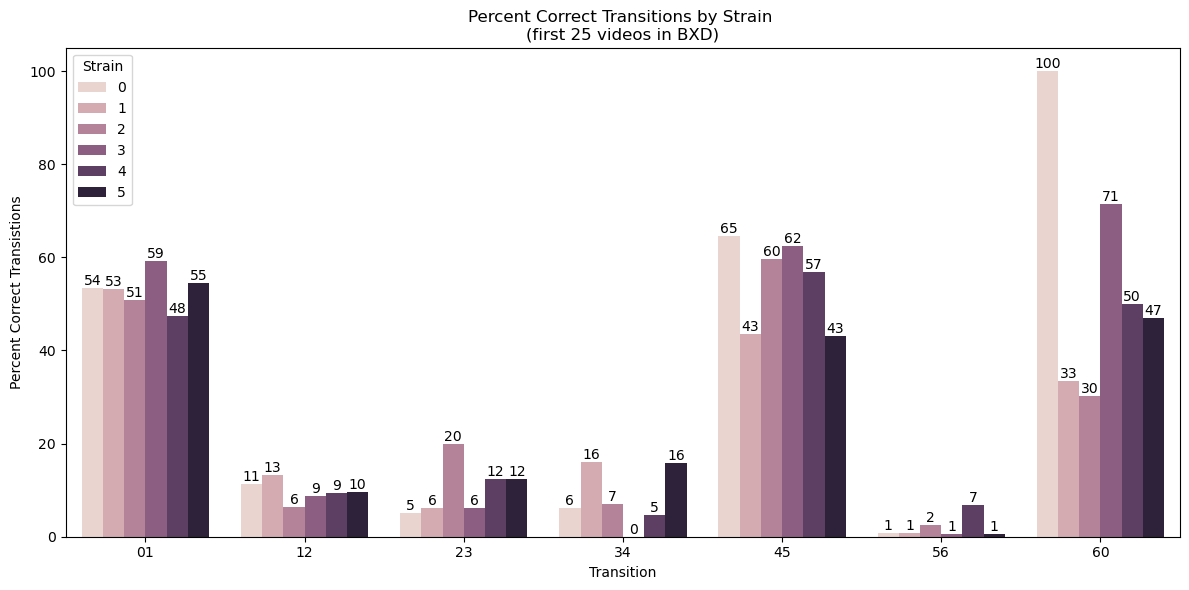

In [10]:
plt.figure(figsize=(12, 6))

ax = sns.barplot(
        data=plot_df,
        x='transition',
        y='percent_correct',
        hue='strain'
    )

for container in ax.containers:
    ax.bar_label(
        container,
        fmt='%.0f',
        fontsize=10,
        #padding=0
    )

plt.ylabel('Percent Correct Transistions')
plt.xlabel('Transition')
plt.title('Percent Correct Transitions by Strain \n(first 25 videos in BXD)')
plt.legend(title='Strain')#, bbox_to_anchor=(1.05, 1))#, loc='upper left')

plt.tight_layout()
plt.show()

In [11]:
bxd50_keys = ['BXD50_tran0','BXD50_tran1','BXD50_tran2','BXD50_tran3','BXD50_tran4','BXD50_tran5','BXD50_tran6',]
bxd50 = {}

for idx, key in enumerate(bxd50_keys):
    bxd50[key] = pd.read_csv(
    searchLogCurtain.fpaths[key], dtype={
        "target": "string",
        "match_num": "int",
        #"interval": "tuple",
        "bout_num": "int",
        "sex": "string",
        "strain": "string",
        #"duration": "list",
        "video_search_index": "int",
        "video_name": "string"
        }
    )

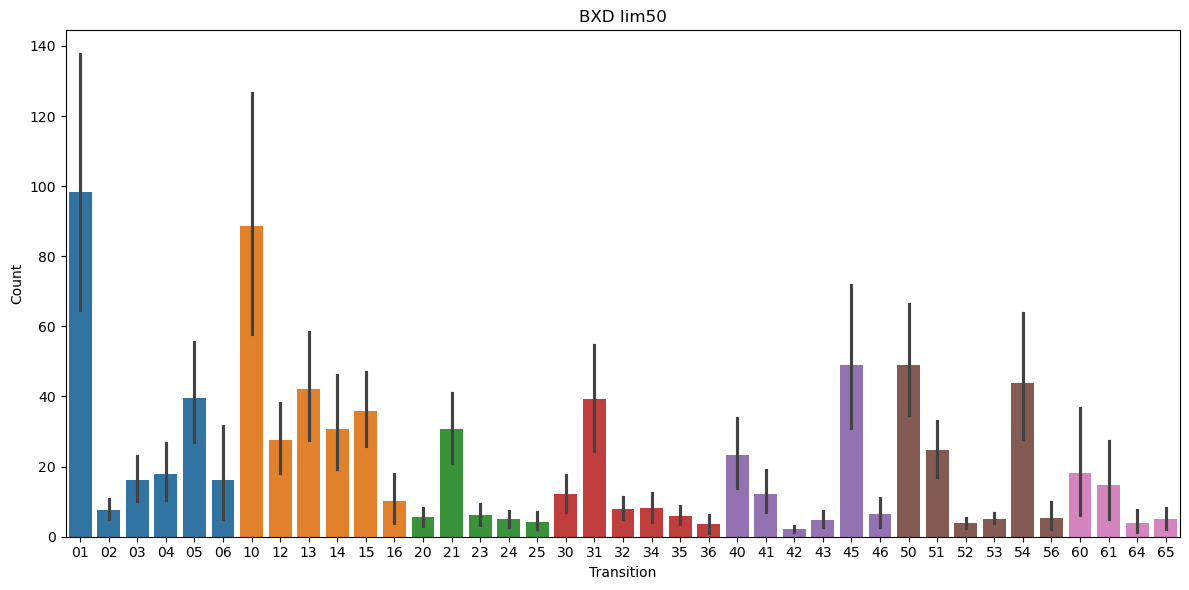

In [12]:
plt.figure(figsize=(12, 6))

for i, key in enumerate(bxd50_keys):

    count_df = (
        bxd50[key]
        .groupby(['target', 'strain'], observed=True)
        .size()
        .reset_index(name='count')
    )

    ax = sns.barplot(data=count_df, x='target', y='count')


plt.ylabel('Count')
plt.xlabel('Transition')
plt.title('BXD lim50')

plt.tight_layout()
plt.show()

In [14]:
ASD_lim100_fulltran = pd.read_csv(searchLogCurtain.fpaths['ASD_fulltran'])

ASD_lim100_fulltran = pd.read_csv(
    searchLogCurtain.fpaths['ASD_fulltran'], dtype={
        "target": "string",
        "match_num": "int",
        #"interval": "tuple",
        "bout_num": "int",
        "sex": "string",
        "strain": "string",
        #"duration": "list",
        "video_search_index": "int",
        "video_name": "string"
        }
    )

BXD_lim100_fulltran = pd.read_csv(
    searchLogCurtain.fpaths['BXD_fulltran'], dtype={
        "target": "string",
        "match_num": "int",
        #"interval": "tuple",
        "bout_num": "int",
        "sex": "string",
        "strain": "string",
        #"duration": "list",
        "video_search_index": "int",
        "video_name": "string"
        }
    )

JABS_lim100_fulltran = pd.read_csv(
    searchLogCurtain.fpaths['JABS_fulltran'], dtype={
        "target": "string",
        "match_num": "int",
        #"interval": "tuple",
        "bout_num": "int",
        "sex": "string",
        "strain": "string",
        #"duration": "list",
        "video_search_index": "int",
        "video_name": "string"
        }
    )


In [40]:
ASD_lim100_fulltran.head()

,target,match_num,interval,bout_num,sex,strain,duration,video_search_index,video_name
0,01,1,"(8207, 8225)",4,M,B6129SF1/J,[9 9],0,asd/projects/kumar-lab/open-field-datasets/aut...
1,01,2,"(20076, 20307)",11,M,B6129SF1/J,[107 124],0,asd/projects/kumar-lab/open-field-datasets/aut...
2,01,3,"(20399, 20463)",11,M,B6129SF1/J,[55 9],0,asd/projects/kumar-lab/open-field-datasets/aut...
3,01,4,"(25222, 25353)",13,M,B6129SF1/J,[110 21],0,asd/projects/kumar-lab/open-field-datasets/aut...
4,01,5,"(26816, 26921)",13,M,B6129SF1/J,[98 7],0,asd/projects/kumar-lab/open-field-datasets/aut...


In [52]:
#print(ASD_lim100_fulltran[ASD_lim100_fulltran['target' == '62']].shape)
#print(ASD_lim100_fulltran[ASD_lim100_fulltran['target' == '63']].shape)
#ASD_lim100_fulltran['target' == '10']
ASD_lim100_fulltran[ASD_lim100_fulltran['target'] == '63'].shape

(0, 9)

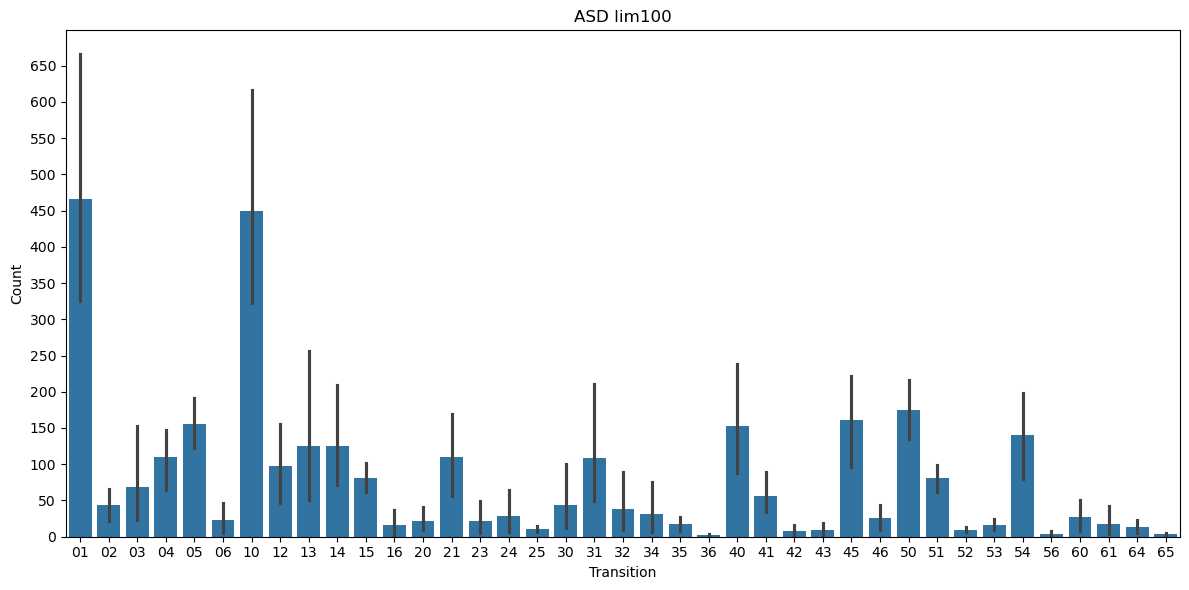

In [43]:
plt.figure(figsize=(12, 6))

asd_count_df = (ASD_lim100_fulltran.groupby(['target', 'strain'], observed=True).size().reset_index(name='count'))

ax = sns.barplot(data=asd_count_df, x='target', y='count')

plt.ylabel('Count')
plt.xlabel('Transition')
plt.title('ASD lim100')

plt.yticks(np.arange(0, 700, 50))

plt.tight_layout()
plt.show()

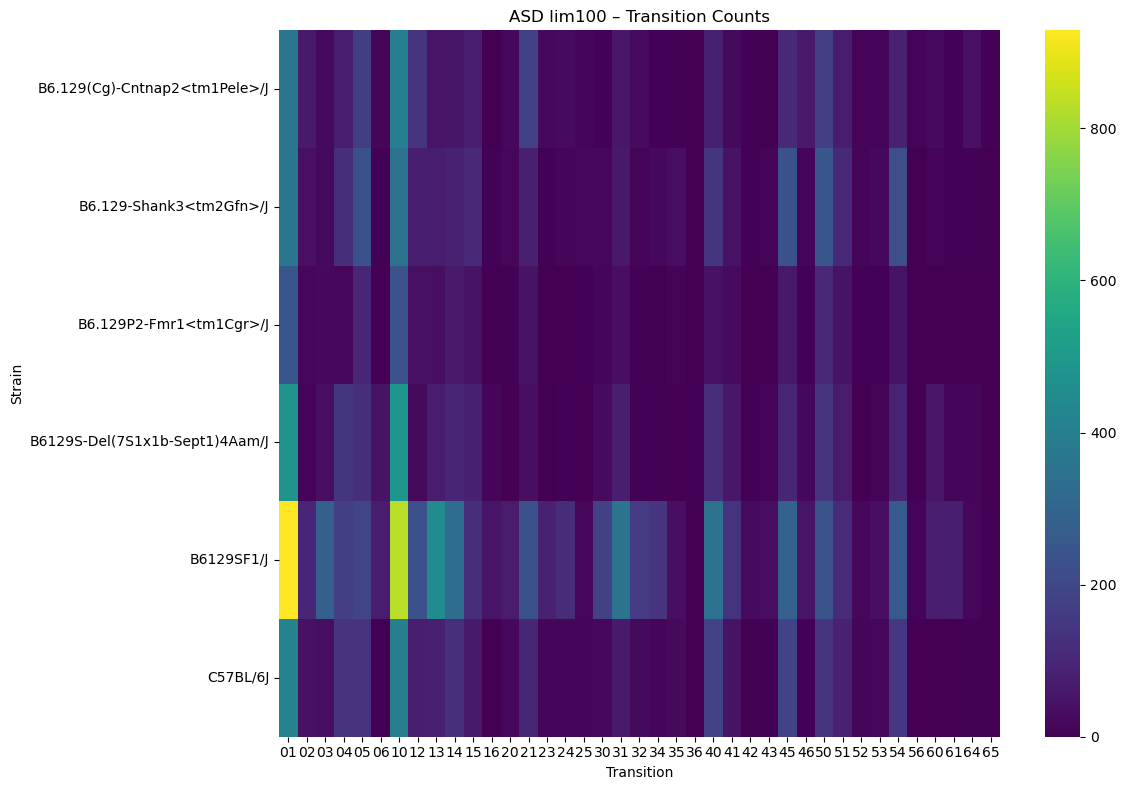

In [36]:
asd_heatmap_df = asd_count_df.pivot(index='strain', columns='target', values='count').fillna(0)
plt.figure(figsize=(12, 8))

ax = sns.heatmap(
    asd_heatmap_df,
    cmap='viridis',
    #linewidths=0.5,
    #linecolor='white'
)

ax.set_xlabel('Transition')
ax.set_ylabel('Strain')
ax.set_title('ASD lim100 – Transition Counts')

plt.tight_layout()
plt.show()

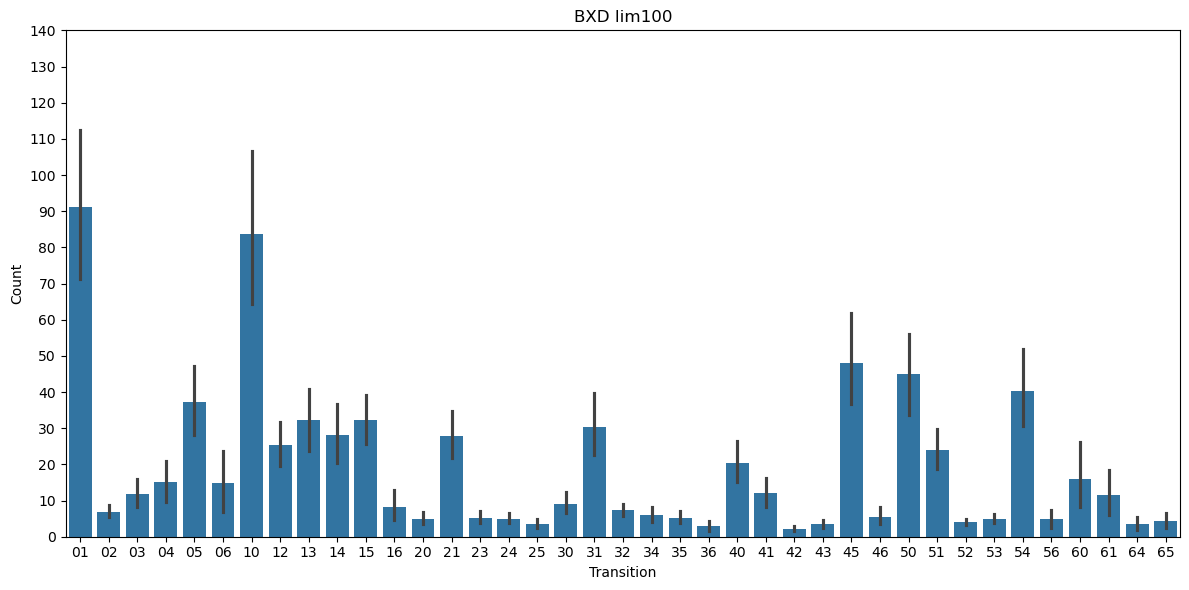

In [34]:
plt.figure(figsize=(12, 6))

bxd_count_df = (BXD_lim100_fulltran.groupby(['target', 'strain'], observed=True).size().reset_index(name='count'))

ax = sns.barplot(data=bxd_count_df, x='target', y='count')

plt.ylabel('Count')
plt.xlabel('Transition')
plt.title('BXD lim100')

plt.yticks(np.arange(0, 150, 10))

plt.tight_layout()
plt.show()

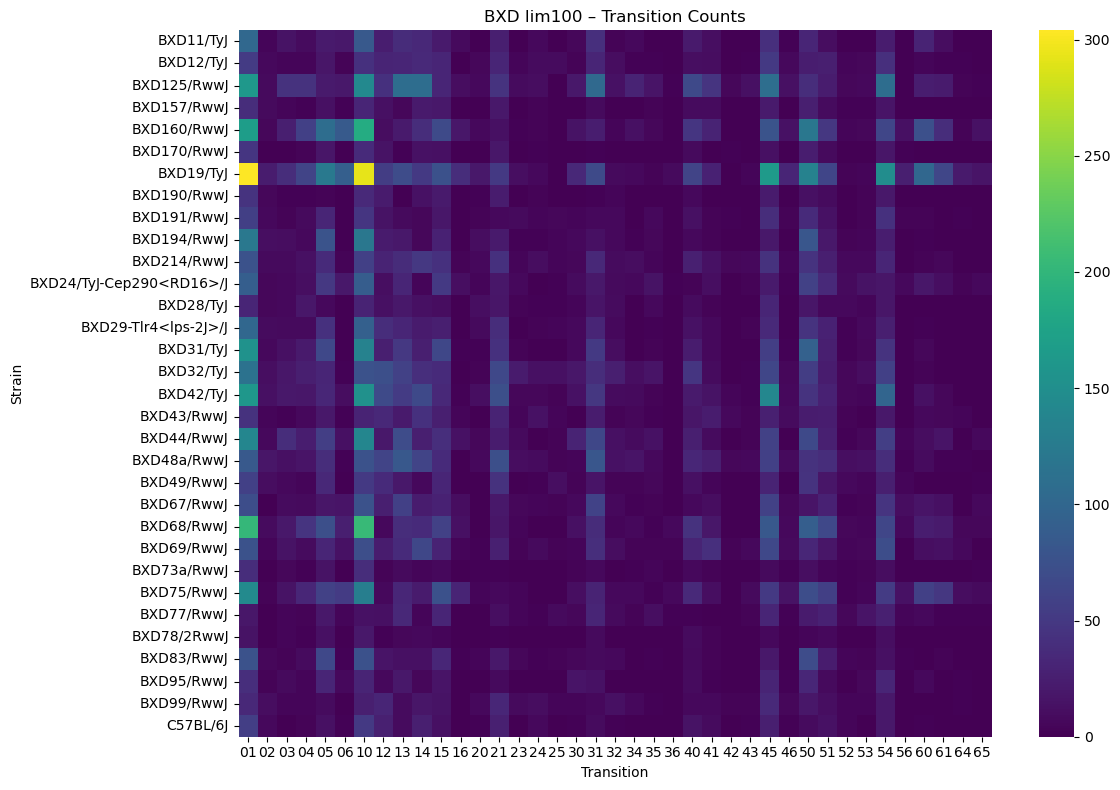

In [37]:
bxd_heatmap_df = bxd_count_df.pivot(index='strain', columns='target', values='count').fillna(0)
plt.figure(figsize=(12, 8))

ax = sns.heatmap(
    bxd_heatmap_df,
    cmap='viridis',
    #linewidths=0.5,
    #linecolor='white'
)

ax.set_xlabel('Transition')
ax.set_ylabel('Strain')
ax.set_title('BXD lim100 – Transition Counts')

plt.tight_layout()
plt.show()

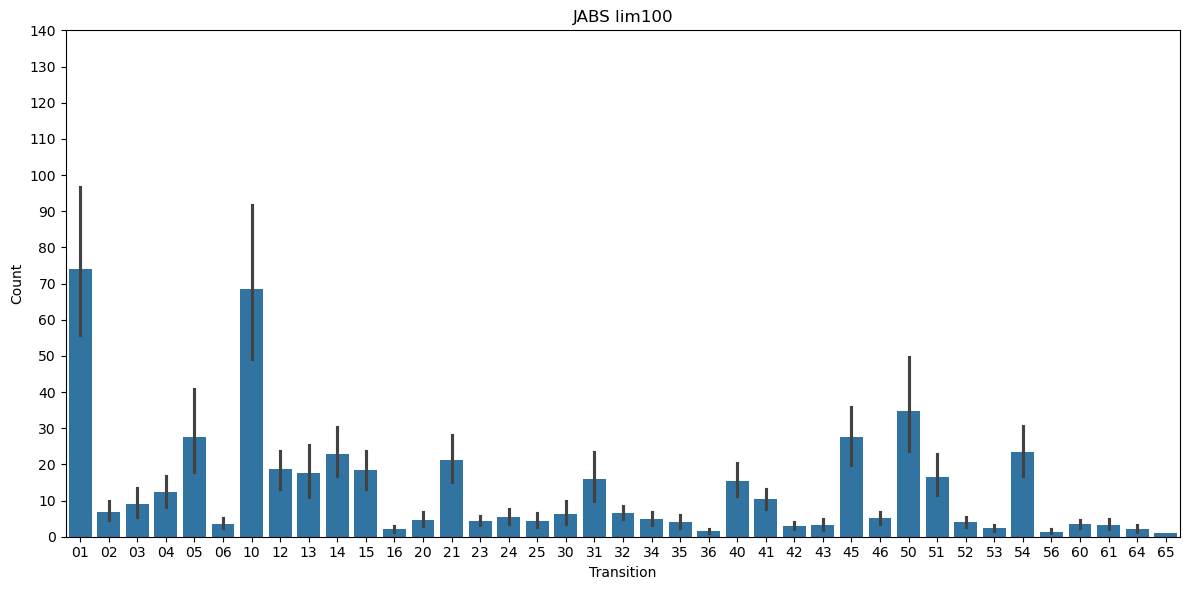

In [38]:
plt.figure(figsize=(12, 6))

jabs_count_df = (JABS_lim100_fulltran.groupby(['target', 'strain'], observed=True).size().reset_index(name='count'))

ax = sns.barplot(data=jabs_count_df, x='target', y='count')

plt.ylabel('Count')
plt.xlabel('Transition')
plt.title('JABS lim100')

plt.yticks(np.arange(0, 150, 10))

plt.tight_layout()
plt.show()

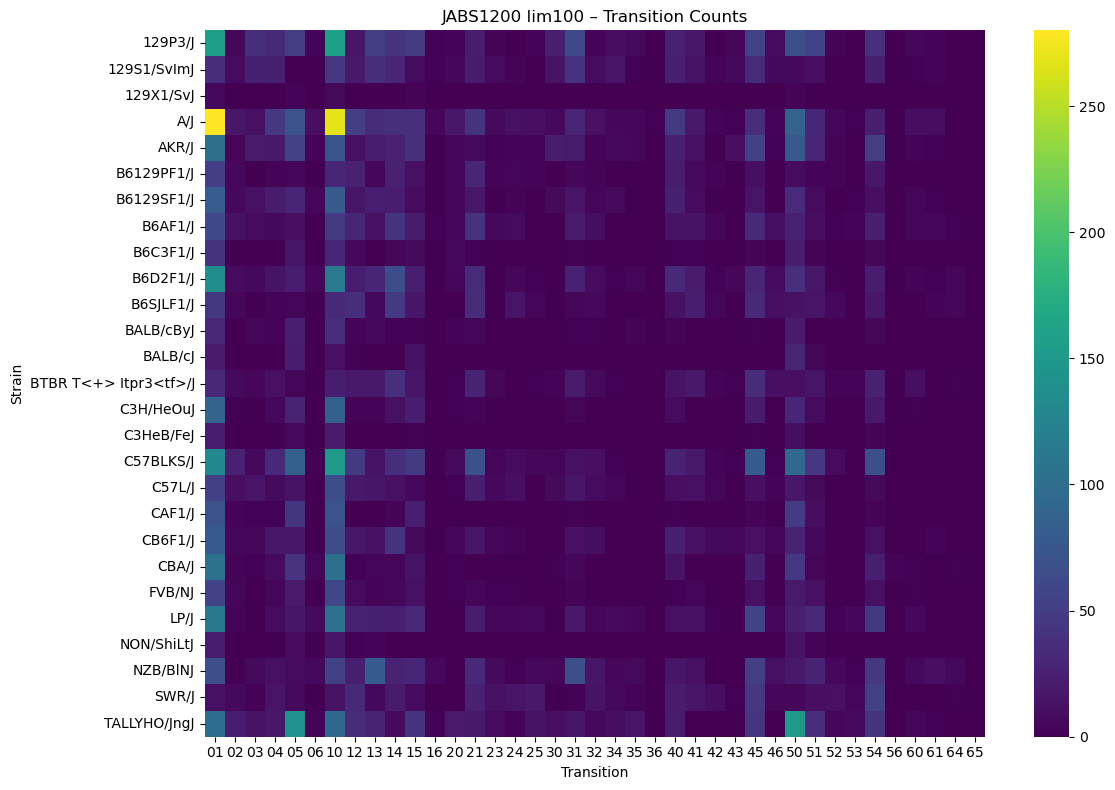

In [54]:
jabs_heatmap_df = jabs_count_df.pivot(index='strain', columns='target', values='count').fillna(0)
plt.figure(figsize=(12, 8))

ax = sns.heatmap(
    jabs_heatmap_df,
    cmap='viridis',
    #linewidths=0.5,
    #linecolor='white'
)

ax.set_xlabel('Transition')
ax.set_ylabel('Strain')
ax.set_title('JABS1200 lim100 – Transition Counts')

plt.tight_layout()
plt.show()